<Figure size 1200x700 with 0 Axes>

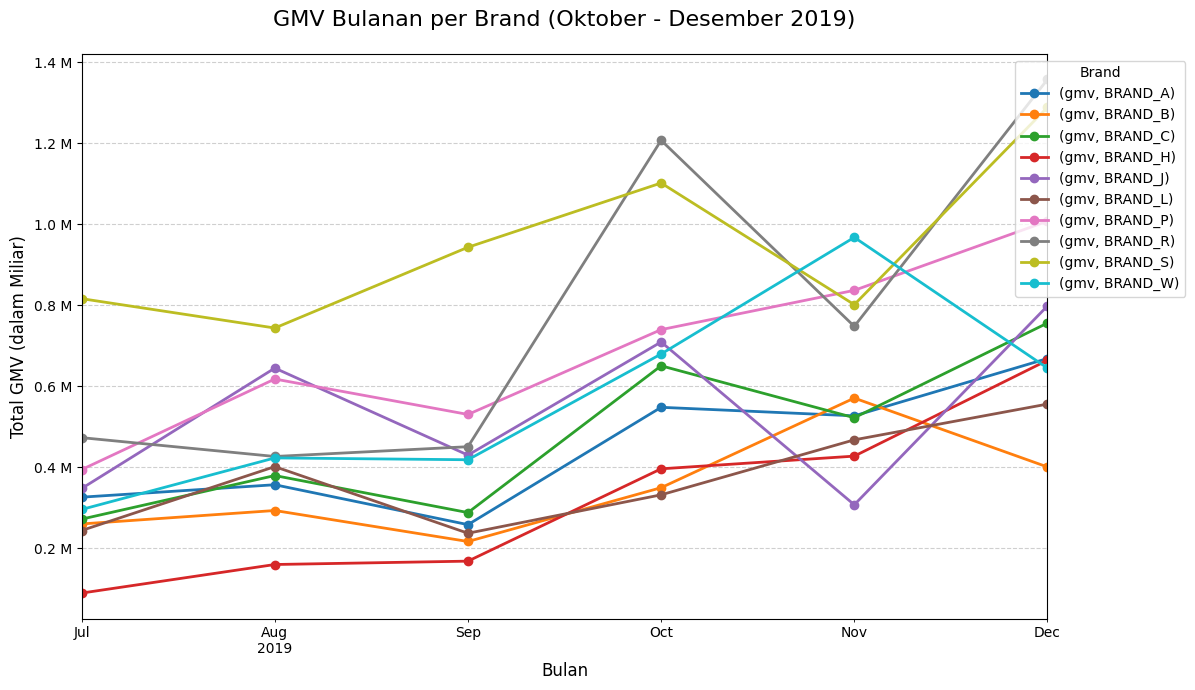

In [1]:
# Langkah 0: Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt

# Langkah 1: Membaca dataset
dataset = pd.read_csv('retail_raw_reduced.csv')

# Langkah 2: Persiapan data
# Mengubah 'order_date' ke format datetime
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

# Membuat kolom 'gmv' (Gross Merchandise Value)
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Membuat kolom 'order_month' dengan format YYYY-MM
dataset['order_month'] = dataset['order_date'].dt.to_period('M')

# Langkah 3: Agregasi data dan pivot menggunakan .unstack()
# - groupby(): Mengelompokkan data berdasarkan bulan dan brand
# - agg(): Menghitung total GMV untuk setiap grup
# - unstack(): Memindahkan indeks 'brand' menjadi kolom
monthly_gmv = dataset.groupby(['order_month', 'brand']).agg({'gmv': 'sum'}).unstack()

# Langkah 4: Membuat Multi-Line Chart
# Mengatur ukuran figure (grafik)
plt.figure(figsize=(12, 7))

# Membuat plot dari data 'monthly_gmv'
# Setiap kolom (brand) akan otomatis menjadi satu garis
monthly_gmv.plot(
    kind='line',
    figsize=(12, 7),
    marker='o', # Menambahkan titik penanda di setiap bulan
    linewidth=2 # Menebalkan garis
)


# Kustomisasi Grafik
plt.title('GMV Bulanan per Brand (Oktober - Desember 2019)', fontsize=16, pad=20)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total GMV (dalam Miliar)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Brand', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=0) # Agar label bulan tidak miring

# Mengubah format label sumbu y agar lebih mudah dibaca (misal: 2.0e9 menjadi 2 Miliar)
# Fungsi untuk format y-axis
def format_y_axis(y, pos):
    return f'{y/1e9:.1f} M'

# Menggunakan FuncFormatter dari matplotlib
from matplotlib.ticker import FuncFormatter
ax = plt.gca() # Get current axes
ax.yaxis.set_major_formatter(FuncFormatter(format_y_axis))

plt.tight_layout() # Merapikan layout
plt.show() # Menampilkan grafik

In [2]:
import pandas as pd

# 1. Membaca data
dataset = pd.read_csv('retail_raw_reduced.csv')

# 2. Mengubah tipe data kolom tanggal
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

# 3. Menentukan top 5 brand berdasarkan total kuantitas dari keseluruhan data
top_brands_df = dataset.groupby('brand')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(5)
print("Top 5 Brand Terlaris (Keseluruhan):")
print(top_brands_df)

# Mengambil nama brand-nya saja untuk memfilter
top_brands_list = top_brands_df['brand'].tolist()

# 4. Membuat dataframe baru dengan filter top 5 brand DAN transaksi di bulan Desember 2019
dataset_top5brand_dec = dataset[
    (dataset['brand'].isin(top_brands_list)) &
    (dataset['order_date'].dt.month == 12) &
    (dataset['order_date'].dt.year == 2019)
]

print("\nCuplikan Hasil Akhir (dataset_top5brand_dec):")
print(dataset_top5brand_dec.head())

Top 5 Brand Terlaris (Keseluruhan):
     brand  quantity
6  BRAND_P     10130
8  BRAND_S      9645
0  BRAND_A      5752
9  BRAND_W      5609
2  BRAND_C      5366

Cuplikan Hasil Akhir (dataset_top5brand_dec):
    order_id order_date  customer_id             city     province product_id  \
8    1741846 2019-12-30        16873    Jakarta Barat  DKI Jakarta      P3203   
14   1734790 2019-12-18        17422  Jakarta Selatan  DKI Jakarta      P0122   
35   1741561 2019-12-29        13521          Bandung   Jawa Barat      P3344   
38   1735633 2019-12-19        17096  Jakarta Selatan  DKI Jakarta      P3285   
48   1729846 2019-12-10        17231           Bekasi   Jawa Barat      P3537   

      brand  quantity  item_price  
8   BRAND_S        32      450000  
14  BRAND_A        12      695000  
35  BRAND_S         2      520000  
38  BRAND_S         4     1325000  
48  BRAND_S         2     1745000  
